## load data

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import load_digits
#data = load_boston()
data = load_digits()
datas = data['data']
targets = data['target']

In [17]:
pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [18]:
from sklearn.decomposition import PCA

In [52]:
from pca import PCA

In [19]:
pca = PCA(datas.shape[1])
pca.fit(datas)

PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
datas_reduction = pca.transform(datas)

In [21]:
variance = np.var(datas_reduction,axis=0)

In [22]:
variance /= variance.sum()

In [23]:
plt.plot(np.cumsum(variance),'b-')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## test pca

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def demean(X:np.ndarray):
    return X - X.mean(axis=0)
    

def normalize(w:np.ndarray):
    return w/np.linalg.norm(w)

def f(w:np.ndarray,X:np.ndarray):
    return np.sum((X.dot(w))**2)/len(X)
    

def df(w:np.ndarray,X:np.ndarray):
    return X.T.dot(X.dot(w))*2 /len(X)

def component(w:np.ndarray,X:np.ndarray,max_iter= 1e3,epsilon = 1e-8,eta=0.01):
    '''
    m = len(X)
    w = np.ones(X.shape[1])
    for iter in np.arange(max_iter):
        random_inx = np.random.permutation(m)
        for i in np.arange(m):
            learning_rate = 10/(50+iter)
            last_f = f(w,X)
            gradient = df(w,X)
            w = w + learning_rate*gradient
            w = normalize(w)
    return w

    '''
    
    w = np.ones(X.shape[1])
    w = normalize(w)
    for iter in np.arange(max_iter):
        learning_rate = 10/(50+iter)
        last_f = f(w,X)
        gradient = df(w,X)
        w = w + learning_rate*gradient
        w = normalize(w)
        #if np.abs(last_f-f(w,X))<epsilon:
            #break
    return w
    
    
def my_pca(X:np.ndarray,n):
    assert X.ndim ==2 ,"X must be 2 dimensional"
    assert n<=X.shape[1],"numbers of featured direction must be no more than features of X."
    X_p = demean(X.copy())
    W=[]
    res = []
    for i in np.arange(n):
        w = np.ones(X.shape[1])
        w = component(w,X_p)
        W.append(w)
        x_component = X_p.dot(w)
        res.append(x_component)
        X_p = demean(X_p - x_component.reshape(-1,1)*w)
    return np.array(res).reshape((-1,n)),np.array(W)

def transform(X:np.ndarray,W:np.ndarray):
    return X.dot(W.T)

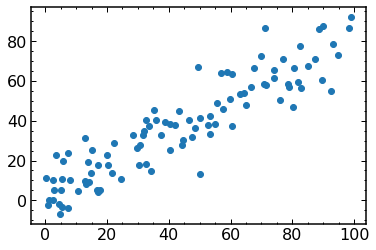

In [21]:
m=100
X = np.empty((m,2))
X[:,0]=np.random.uniform(0,100,size=m)
X[:,1]=0.75*X[:,0]+3+np.random.normal(0,10,size=m)

plt.scatter(X[:,0],X[:,1])

In [ ]:

X = demean(X)
w = np.random.rand(X.shape[1])

w = component(w,X)
X_p = X.dot(w).reshape((-1,1))*w
# X_p =np.c_[X.dot(w)*w[0],X.dot(w)*w[1]]
print(w)
print(np.linalg.norm(w))
plt.scatter(X[:,0],X[:,1])
plt.plot(X_p[:,0],X_p[:,1],'r-')
plt.plot(X[:,0]-X_p[:,0],X[:,1]-X_p[:,1],'ko')
plt.xlim([-50,50])
plt.ylim([-50,50])

In [ ]:
X = demean(X)
w = my_pca(X,2)[1]
plt.scatter(X[:,0],X[:,1])
X_1 = X.dot(w[0]).reshape((-1,1))*w[0]
X_2 = X.dot(w[1]).reshape((-1,1))*w[1]
plt.plot(X_1[:,0],X_1[:,1],'ro',alpha = 0.6)
plt.plot(X_2[:,0],X_2[:,1],'go',alpha=0.6)

In [ ]:
np.sum(np.prod(w,axis=0))

## test my_pca

In [44]:
from sklearn import datasets
from model_selection import train_test_split
from kn_classifier import KNclassifier
from pca import PCA
digits = datasets.load_digits()

In [45]:

X = digits.data
y = digits.target
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [46]:
knn = KNclassifier(5,weights='distance')

(1797, 64)

In [80]:
test_pca = PCA(2)
test_pca.fit(X)
X_reduction = test_pca.transform(X)

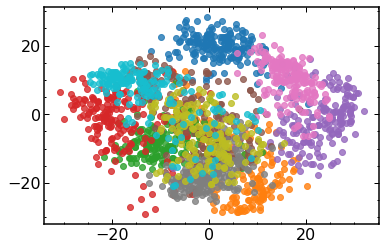

In [81]:
for i in range(10):
    plt.scatter(X_reduction[y==i,0],X_reduction[y==i,1],alpha=0.8)

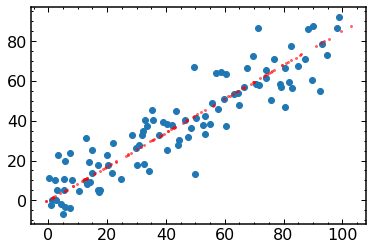

In [23]:
test_pca.fit(X)

X_p = test_pca.transform(X)
X_s = test_pca.inverse_transform(X_p)

plt.scatter(X[:,0],X[:,1])
plt.plot(X_s[:,0],X_s[:,1],'ro',alpha=0.5,ms=2)

## sklearn中的pca

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)

In [ ]:
pca.components_

In [ ]:
w1 = pca.components_[0]

In [ ]:
X_p = X.dot(w).reshape((-1,1))*w
# X_p =np.c_[X.dot(w)*w[0],X.dot(w)*w[1]]
print(w1)
print(np.linalg.norm(w1))
plt.scatter(X[:,0],X[:,1])
plt.plot(X_p[:,0],X_p[:,1],'r-')
plt.plot(X[:,0]-X_p[:,0],X[:,1]-X_p[:,1],'ko')
plt.xlim([-50,50])
plt.ylim([-50,50])

## PCA noise reduction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits
data = load_digits()
X = data['data']
y = data['target']

In [4]:
noisy_digits = X + np.random.normal(0,4,size=X.shape)

example_digits = noisy_digits[y==0][:10]
for num in range(1,10):
    X_num = noisy_digits[y==num][:10]
    example_digits = np.vstack([example_digits,X_num])

In [11]:
example_digits.shape

(100, 64)

In [18]:
def plot_digits(data):
    fig,axes = plt.subplots(10,10,figsize =(10,10),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap='binary',interpolation='nearest',clim=(0,16))
        
    plt.show()

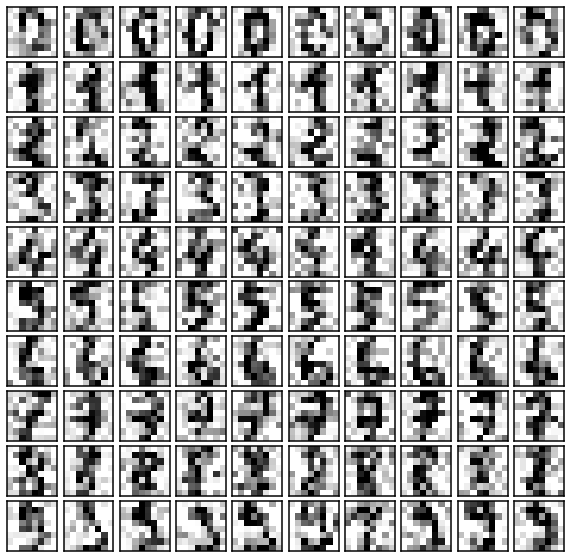

In [19]:
plot_digits(example_digits)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(0.4)

pca.fit(example_digits)
example_digits_reduction = pca.inverse_transform( pca.transform(example_digits))
pca.components_.shape

In [38]:
plot_digits(example_digits_reduction)